In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
parks = gpd.read_file('../data/parks.geojson')
print(parks.crs)
parks.head( )

epsg:4326


,acres,name,year_estab,common_nam,status,address,lon,lat,descriptio,geometry
0,69.86,Harpeth River Park,1988,Harpeth River,PARK,7820 Coley Davis Rd,-86.9592214,36.07738249,Harpeth River State Park has much historical a...,"MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ..."
1,9.88,Harpeth Knoll Park,1972,Harpeth Knoll,PARK,708 Goodpasture Terrace,-86.93815537,36.05942777,"Huge grassy field with playground, and shade s...","MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ..."
2,17.14,Bellevue Park,1982,Red Caboose,PARK,656 Colice Jeanne Rd,-86.93354496,36.07159731,"Bellevue Park, known as Red Caboose Park, is p...","MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ..."
3,809.59,Bells Bend Park,2007,Bells Bend,PARK,4187 Old Hickory Blvd,-86.92646294,36.15016925,"Located in western Davidson County, this park ...","MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ..."
4,2168.792,Alvin G. Beaman Park,1996,Beaman,PARK,5911 Old Hickory Blvd.,-86.91984207,36.26075833,Beaman Park provides education and awareness p...,"MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ..."


In [3]:
type(parks)

geopandas.geodataframe.GeoDataFrame

In [4]:
# parks.geometry.to_crs('EPSG:4326')
# print(parks.crs)

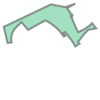

In [5]:
parks.loc[0, 'geometry']

In [6]:
print(parks.loc[0, 'geometry'])

MULTIPOLYGON (((-86.95546524763979 36.07930145579854, -86.95577768867267 36.0791390934377, -86.95554165522448 36.07881679726515, -86.95555002481612 36.07876336296327, -86.95547131924887 36.07872072961796, -86.95532248405858 36.07851744306786, -86.95528618171004 36.07845372197693, -86.95525327758185 36.07839107173579, -86.95523923349029 36.07834887403824, -86.95522977080738 36.07832175489392, -86.95522131619775 36.07829407526238, -86.95521421491281 36.07826638490727, -86.95520846364511 36.07823840895774, -86.95520406570714 36.07821042318611, -86.95520101888307 36.0781821509104, -86.9551993253869 36.07815386881271, -86.95519898519579 36.07812557509128, -86.95519999833 36.07809727154806, -86.95520236476608 36.07806895638105, -86.9552057503346 36.07804090893737, -86.955210827808 36.0780128471868, -86.9550086936845 36.07817351059672, -86.95500864747362 36.07817345327956, -86.95499806745696 36.07816107206578, -86.9549716235682 36.07813012168268, -86.95500338104712 36.07803322156244, -86.9550

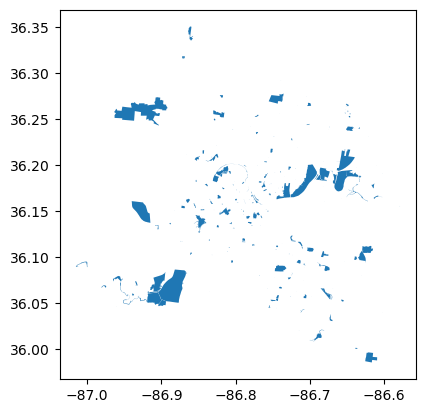

In [7]:
parks.plot();

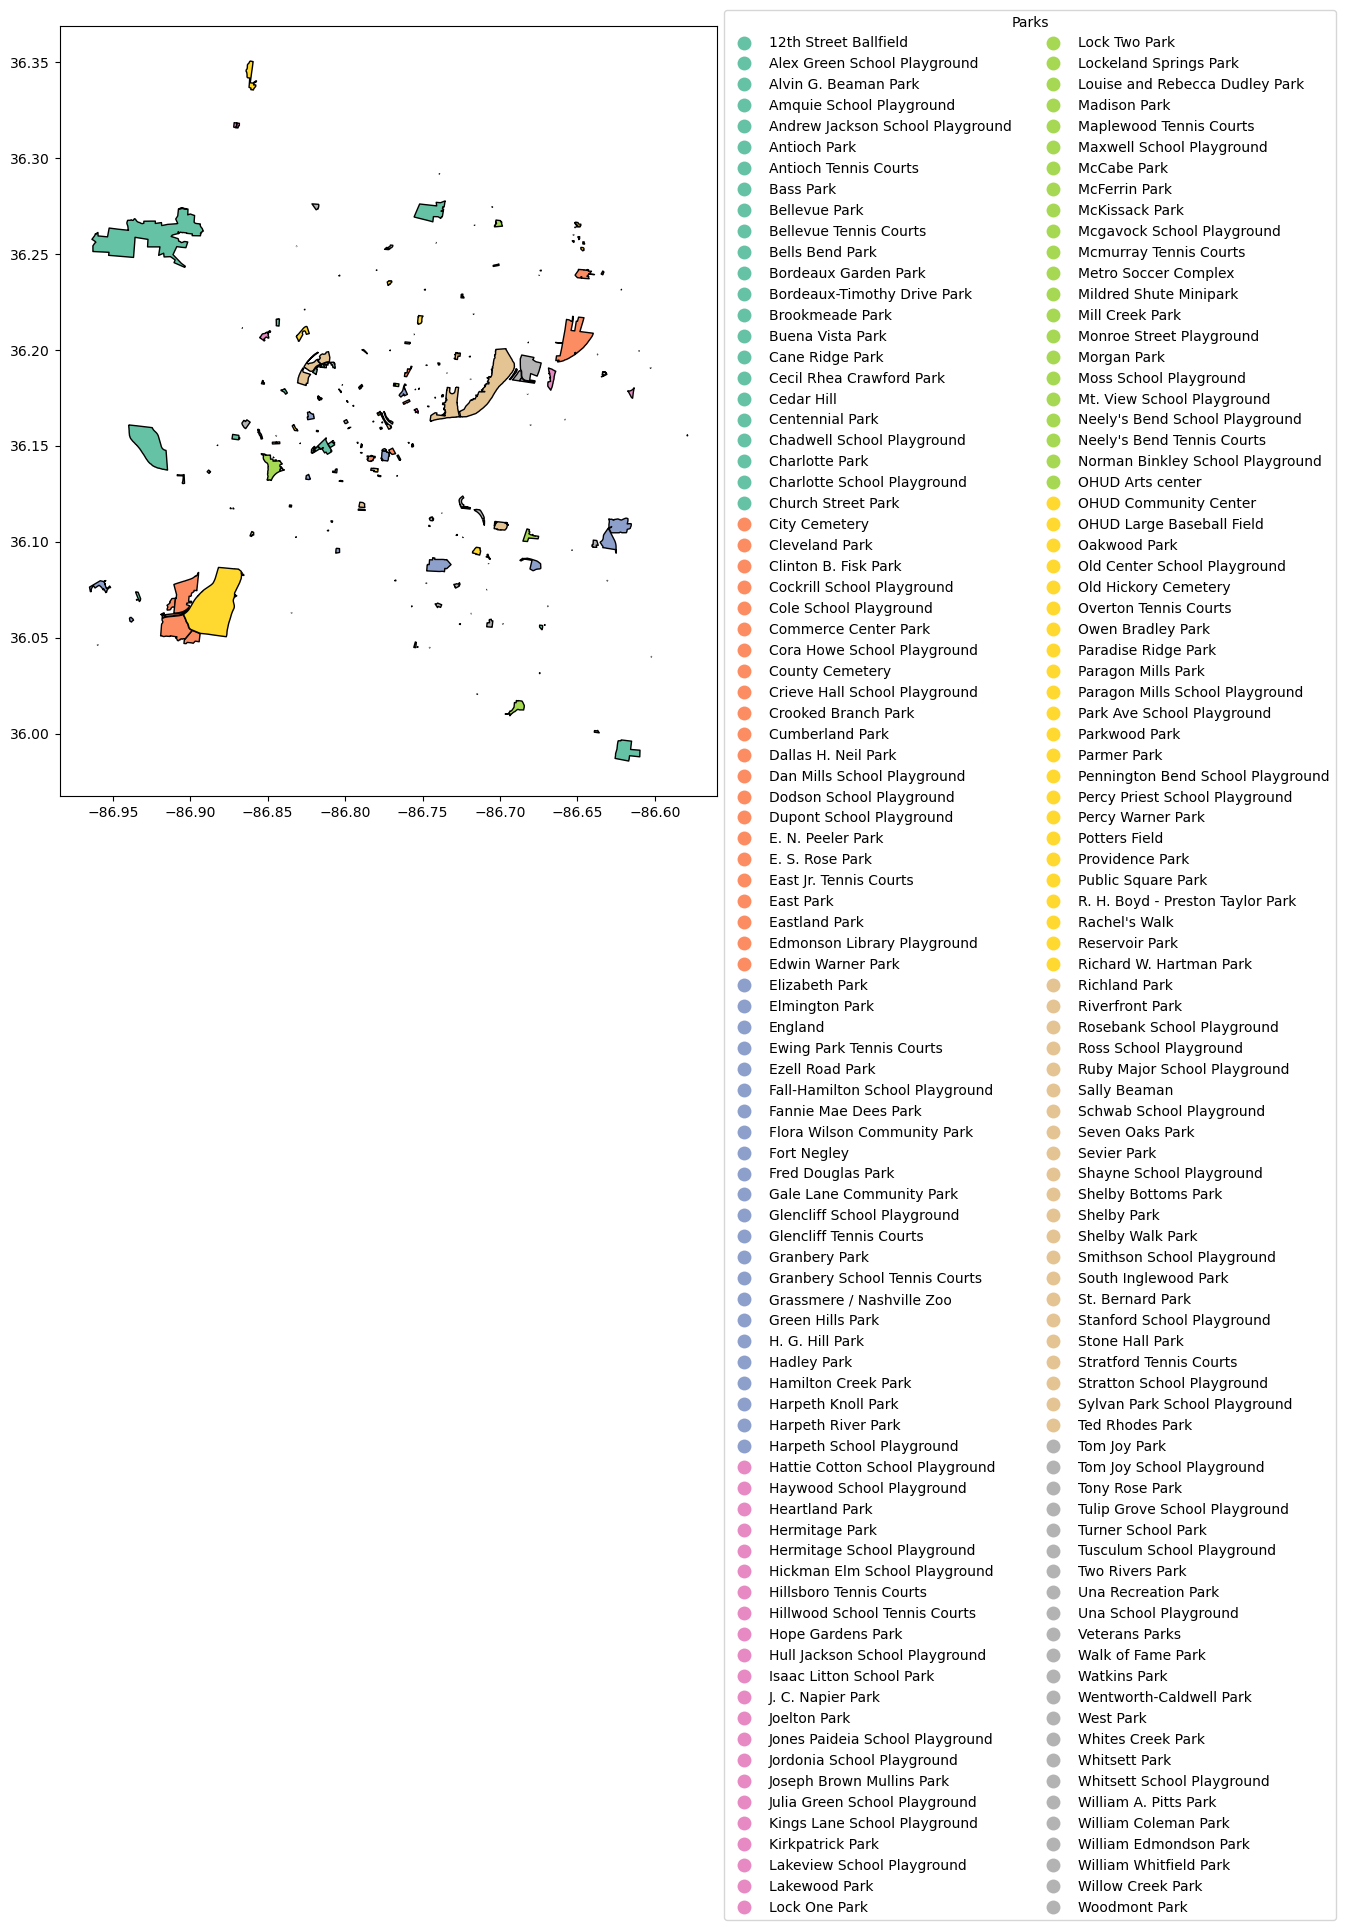

In [8]:
#geopandas handles legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Parks', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

parks.plot(column = 'name', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [9]:
health_clinics = pd.read_csv('../data/health.csv')
print(health_clinics.shape)
health_clinics.head(3)

(4, 4)


,Clinic Name,Phone,Hours,Location 1
0,East Public Health Center,(615) 862-7916,Monday - Friday 7:30 am until 4:30 pm,"1015 East Trinity Lane\nNashville, TN\n(36.204..."
1,Woodbine Public Health Center,(615) 862-7940,Monday - Friday 7:00 am until 4:30 pm,"224 Oriel Avenue\nNashville, TN\n(36.122097, -..."
2,Lentz Public Health Center,(615) 340-5616,Monday - Friday 8:00 am until 4:30 pm,"2500 Charlotte Avenue\nNashville, TN\n(36.1550..."


In [10]:
health_clinics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Clinic Name  4 non-null      object
 1   Phone        4 non-null      object
 2   Hours        4 non-null      object
 3   Location 1   4 non-null      object
dtypes: object(4)
memory usage: 256.0+ bytes


In [11]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [12]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

In [14]:
type(health_clinics)

pandas.core.frame.DataFrame

In [15]:
print(health_clinics.head())

                                       Clinic Name           Phone  \
0                        East Public Health Center  (615) 862-7916   
1                    Woodbine Public Health Center  (615) 862-7940   
2                       Lentz Public Health Center  (615) 340-5616   
3  South Nashville WIC Nutrition Center (WIC Only)  (615) 880-3210   

                                               Hours  \
0              Monday - Friday 7:30 am until 4:30 pm   
1              Monday - Friday 7:00 am until 4:30 pm   
2              Monday - Friday 8:00 am until 4:30 pm   
3  Monday – Thursday  7:30 am – 6:00 pm; Friday 7...   

                                          Location 1  
0  1015 East Trinity Lane\nNashville, TN\n(36.204...  
1  224 Oriel Avenue\nNashville, TN\n(36.122097, -...  
2  2500 Charlotte Avenue\nNashville, TN\n(36.1550...  
3  3718 Nolensville Pike\nNashville, TN\n(36.0936...  


In [16]:
health_clinics.head()

,Clinic Name,Phone,Hours,Location 1
0,East Public Health Center,(615) 862-7916,Monday - Friday 7:30 am until 4:30 pm,"1015 East Trinity Lane\nNashville, TN\n(36.204..."
1,Woodbine Public Health Center,(615) 862-7940,Monday - Friday 7:00 am until 4:30 pm,"224 Oriel Avenue\nNashville, TN\n(36.122097, -..."
2,Lentz Public Health Center,(615) 340-5616,Monday - Friday 8:00 am until 4:30 pm,"2500 Charlotte Avenue\nNashville, TN\n(36.1550..."
3,South Nashville WIC Nutrition Center (WIC Only),(615) 880-3210,Monday – Thursday 7:30 am – 6:00 pm; Friday 7...,"3718 Nolensville Pike\nNashville, TN\n(36.0936..."


In [13]:
health_clinics['geometry'] = health_clinics.apply(lambda x: Point((x.lng, 
                                                         x.lat)), 
                                        axis=1)
health_clinics.head(3)

AttributeError: 'Series' object has no attribute 'lng'